In [ ]:


!wget -P /content https://www.ppgia.pucpr.br/~aghochuli/coins.zip
!unzip /content/coins.zip -d /content/coins

dataset_path = '/content/coins'

import cv2
import numpy as np
import os

def carregar_imagens(caminho):
    imagens = []
    rotulos = []
    for pasta in os.listdir(dataset_path ):
        for arquivo in os.listdir(os.path.join(caminho, pasta)):
            img = cv2.imread(os.path.join(caminho, pasta, arquivo))
            if img is None:
                print(f"Erro ao carregar a imagem: {os.path.join(caminho, pasta, arquivo)}")
                continue
            img = cv2.resize(img, (128, 128))
            imagens.append(img)
            rotulos.append(pasta)
    return np.array(imagens), np.array(rotulos)

imagens, rotulos = carregar_imagens(dataset_path)
print(f'Carregamos {len(imagens)} imagens')


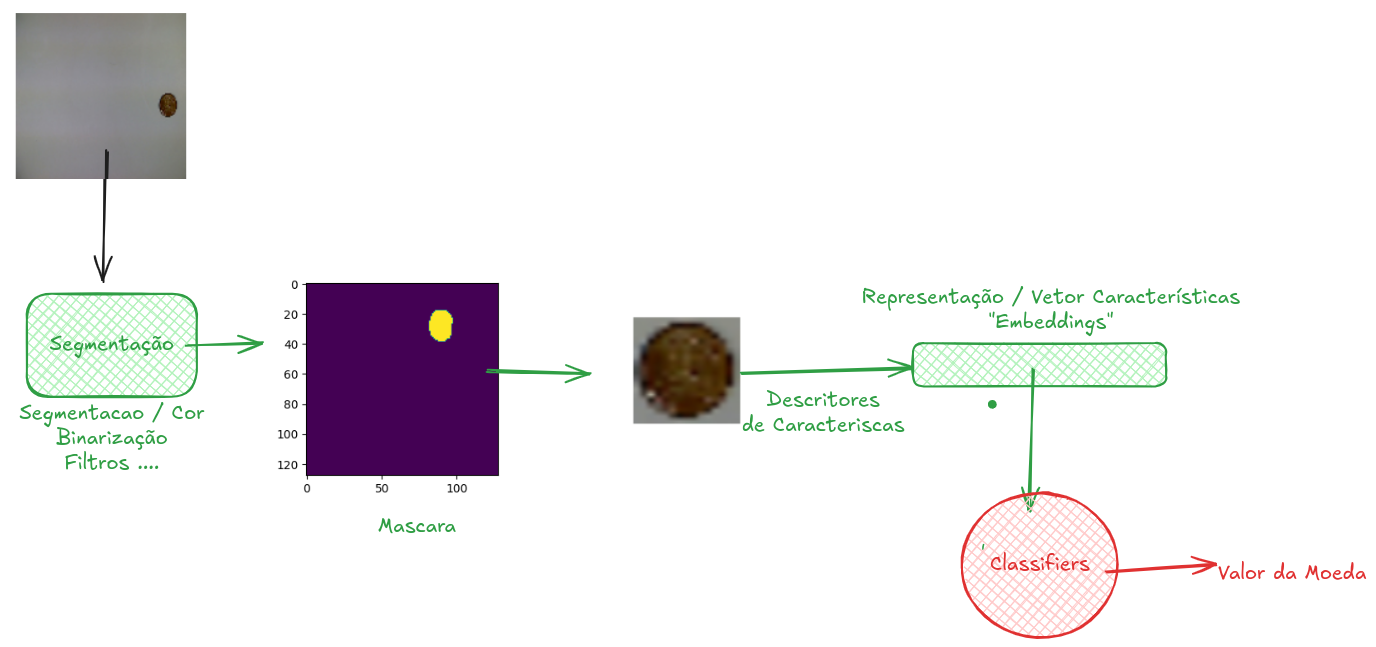

In [ ]:
!wget wget https://www.ppgia.pucpr.br/~aghochuli/coins.zip

--2024-09-15 19:39:54--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2024-09-15 19:39:54--  https://www.ppgia.pucpr.br/~aghochuli/coins.zip
Resolving www.ppgia.pucpr.br (www.ppgia.pucpr.br)... 104.18.11.132, 104.18.10.132, 2606:4700::6812:a84, ...
Connecting to www.ppgia.pucpr.br (www.ppgia.pucpr.br)|104.18.11.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65804920 (63M) [application/zip]
Saving to: ‘coins.zip.1’

coins.zip.1         100%[===================>]  62.76M   167MB/s    in 0.4s    

2024-09-15 19:39:54 (167 MB/s) - ‘coins.zip.1’ saved [65804920/65804920]

FINISHED --2024-09-15 19:39:54--
Total wall clock time: 0.5s
Downloaded: 1 files, 63M in 0.4s (167 MB/s)


In [ ]:
!unzip -qo coins.zip

In [ ]:
import matplotlib.pyplot as plt

def plot_sidebyside(img_list,titles=None,colormap=None,figsize=(12,6)):
  n = len(img_list)
  figure, axis = plt.subplots(1, n, figsize=figsize)

  if titles is None:
    titles = []
    A = ord('A')
    for i in range(n):
      titles.append(chr(A+i))

  for i in range(n):
    axis[i].imshow(img_list[i], cmap=colormap)
    axis[i].set_title(titles[i])
    axis[i].axis('off')
  # Combine all the operations and display
  plt.show()

In [ ]:
def load_images_and_labels_from_folder(folder_path):
    images = []
    labels = []

    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            # Load the image using OpenCV
            img = cv2.imread(file_path)


            # If the image was loaded successfully
            if img is not None:
                img = cv2.resize(img,(128,128))
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                # Append the image to the list
                images.append(img)

                # Extract the label from the filename (assuming format 'label_filename.jpg')
                label = filename.split('_')[0]
                labels.append(label)
            else:
                print(f"Warning: Failed to load image {filename}")
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(images), np.array(labels)

train_folder = '/content/coins/train'
test_folder = '/content/coins/test'

train_data, train_labels = load_images_and_labels_from_folder(train_folder)
test_data, test_labels = load_images_and_labels_from_folder(test_folder)

(1340, 128, 128, 3)
(500, 128, 128, 3)
['25' '100' '10' '10' '100' '10' '10' '10' '50' '5']


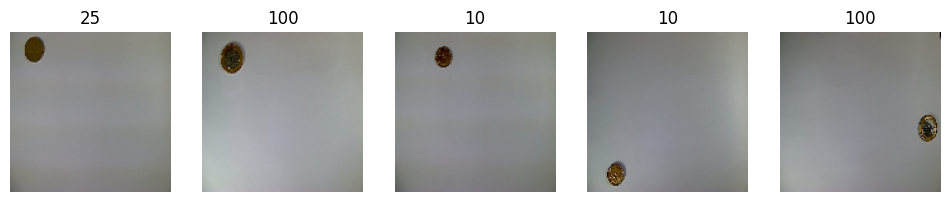

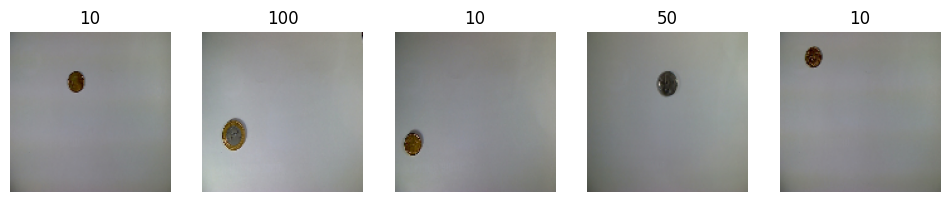

In [ ]:
print(train_data.shape)
print(test_data.shape)
print(train_labels[:10])

plot_sidebyside(train_data[:5],train_labels[:5])
plot_sidebyside(test_data[:5],test_labels[:5])

In [ ]:
def carregar_imagens(caminho):
    imagens = []
    rotulos = []
    for pasta in os.listdir(caminho):
        for arquivo in os.listdir(os.path.join(caminho, pasta)):
            if arquivo.endswith('.jpg'):
                img = cv2.imread(os.path.join(caminho, pasta, arquivo))
                img = cv2.resize(img, (128, 128))  # redimensionamento
                imagens.append(img)
                rotulos.append(pasta)
    return np.array(imagens), np.array(rotulos)


imagens, rotulos = carregar_imagens('coins')
print(f'{len(imagens)} imagens')


Carregamos 1840 imagens


In [ ]:
from skimage.feature import hog

def extrair_caracteristicas_hog(imagens):
    features = []
    for img in imagens:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        features.append(hog(img_gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False))
    return np.array(features)

features = extrair_caracteristicas_hog(imagens)
print(f'Extraímos características HOG de {len(features)} imagens')


Extraímos características HOG de 1840 imagens


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Codificando os rótulos
le = LabelEncoder()
rotulos_codificados = le.fit_transform(rotulos)

X_train, X_test, y_train, y_test = train_test_split(features, rotulos_codificados, test_size=0.3, random_state=42)

from sklearn import svm

modelo_svm = svm.SVC()
modelo_svm.fit(X_train, y_train)

from sklearn.neural_network import MLPClassifier

modelo_rna = MLPClassifier(max_iter=1000)
modelo_rna.fit(X_train, y_train)



Modelos treinados com sucesso!


Acurácia do SVM: 73.19%
Acurácia da RNA: 66.67%


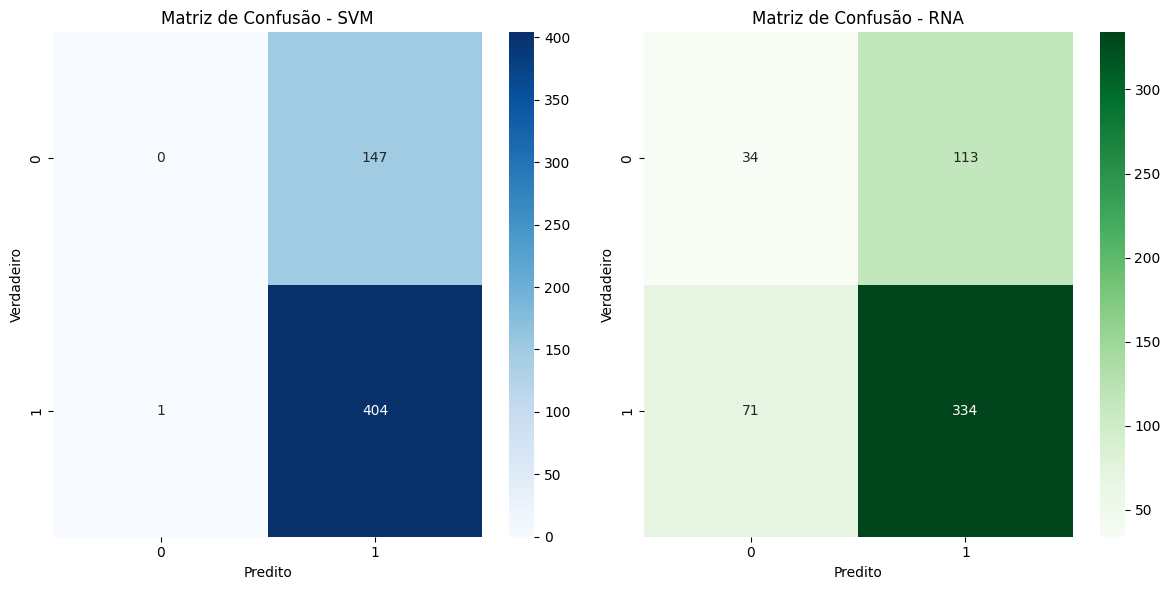

In [ ]:

# Avaliando os modelos
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_svm = modelo_svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

y_pred_rna = modelo_rna.predict(X_test)
acc_rna = accuracy_score(y_test, y_pred_rna)
cm_rna = confusion_matrix(y_test, y_pred_rna)

print(f'Acurácia - SVM: {acc_svm}')
print(f'Acurácia - RNA: {acc_rna}')

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Greens", ax=ax[0])

sns.heatmap(cm_rna, annot=True, fmt="d", cmap="Greens", ax=ax[1])

plt.tight_layout()
plt.show()
